# LaVie Insurance : Technical Report

## 1) Business Understanding

As a struggling US life insurance company, our goal is to increase revenues by 2% using a risk premium based on premature deaths per state. We aim to hike insurance contract prices across the states that cause the highest future risk of premature death rates. This should in turn take our net premium growth rate above annual inflation which we have been on par with for the last five years and move to a more risk-adjusted business model which is key in our industry.

### Technical Report Goal

The primary goal of this project was to run and train statistical models and establish a clear process of understanding, training, validating, and testing the relationship between our dependent and independent variables to perform predictions.

## 2) Data Understanding

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from __init__ import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet,ElasticNetCV
from yellowbrick.regressor import ResidualsPlot

### Importing Dataset

Allow maximum view of Dataframe.

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Importing US Data Analytics from 2019 dataset.

In [3]:
df = pd.read_csv("analytic_data2019.csv", low_memory=False)

### Exploring

In [4]:
df.shape

(3195, 534)

In [5]:
df.head(2)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

## 3) Data Preparation

### Removing Columns

We saw that there were many columns based on statistics of other columns and decided to remove them. 

In [6]:
cicols = []
for column in df.columns:
    if ("CI" in column) or ("(Black)" in column) or ("(White)" in column) or ("(Hispanic)" in column) or ("numerator" in column) or ("denominator" in column):
        cicols.append(column)

In [7]:
df_clean1 = df.drop(cicols, axis=1)

In [8]:
df_clean1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Sexually transmitted infections raw value,Teen births raw value,Uninsured raw value,Primary care physicians raw value,Ratio of population to primary care physicians.,Dentists raw value,Ratio of population to dentists.,Mental health providers raw value,Ratio of population to mental health providers.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Violent crime raw value,Injury deaths raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Child mortality raw value,Infant mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,HIV prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Drug overdose deaths raw value,Motor vehicle crash deaths raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Disconnected youth raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Residential segregation - Black/White raw value,Residential segregation - non-white/white raw value,Homicides raw value,Firearm fatalities raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value,Communicable disease raw value,Self-inflicted injury hospitalizations raw value,Cancer incidence raw value,Coronary heart disease hospitalizations raw value,Cerebrovascular disease hospitalizations raw value,Smoking during pregnancy raw value,Drug arrests raw value,Opioid hospital visits raw value,Alcohol-related hospitalizations raw value,Motor vehicle crash occupancy rate raw value,On-road motor vehicle crash-related ER visits raw value,Off-road motor vehicle crash-related ER visits raw value,Childhood immunizations raw value,Reading proficiency raw value,W-2 enrollment raw value,Poverty raw value,Older adults living alone raw value,Hate crimes raw value,Child abuse raw value,Injury hospitalizations raw value,Fall fatalities 65+ raw value,Year structure built raw value,Male population 0-17 raw value,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue

By removing the statistic based columns we reduced the variables from 534 to 119.

In [9]:
df_clean1.shape

(3195, 119)

Next we checked the number of null values in the remaining columns that were greater than 100 and then removed them.

In [10]:
df_clean1.isnull().sum()[df_clean1.isnull().sum() > 100].sort_values(ascending=False)

Hate crimes raw value                                          3181
Alcohol-related hospitalizations raw value                     3131
Fall fatalities 65+ raw value                                  3129
Self-inflicted injury hospitalizations raw value               3124
Coronary heart disease hospitalizations raw value              3123
Cerebrovascular disease hospitalizations raw value             3123
Drug arrests raw value                                         3122
Off-road motor vehicle crash-related ER visits raw value       3122
Opioid hospital visits raw value                               3122
W-2 enrollment raw value                                       3121
Total female population raw value                              3121
Motor vehicle crash occupancy rate raw value                   3121
Smoking during pregnancy raw value                             3121
On-road motor vehicle crash-related ER visits raw value        3121
Cancer incidence raw value                      

In [11]:
null_cols = []
for column in df_clean1.columns:
    if column in df_clean1.columns[df_clean1.isnull().sum() > 100]:
        null_cols.append(column)

In [12]:
df_clean1 = df_clean1.drop(null_cols, axis=1)

Removing columns with a 100 or more nulls we reduced the variables from 119 to 66.

In [13]:
df_clean1.shape

(3195, 66)

In [14]:
df_clean1.head(2)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,v042_rawvalue,v009_rawvalue,v011_rawvalue,v133_rawvalue,v070_rawvalue,v132_rawvalue,v049_rawvalue,v134_rawvalue,v085_rawvalue,v088_rawvalue,v088_other_data_1,v005_rawvalue,v050_rawvalue,v155_rawvalue,v021_rawvalue,v069_rawvalue,v023_rawvalue,v024_rawvalue,v044_rawvalue,v082_rawvalue,v140_rawvalue,v125_rawvalue,v124_rawvalue,v136_rawvalue,v136_other_data_1,v136_other_data_2,v136_other_data_3,v067_rawvalue,v137_rawvalue,v147_rawvalue,v127_rawvalue,v144_rawvalue,v145_rawvalue,v060_rawvalue,v139_rawvalue,v083_rawvalue,v143_rawvalue,v003_rawvalue,v122_rawvalue,v131_rawvalue,v131_other_data_1,v063_rawvalue,v153_rawvalue,v154_rawvalue,v051_rawvalue,v052_rawvalue,v053_rawvalue,v054_rawvalue,v055_rawvalue,v081_rawvalue,v080_rawvalue,v056_rawvalue,v126_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.2857150971,0.1000885875,0.0006843073,1461.3318468,NaN,NaN,NaN,0.846,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,NaN,0.1837308951,NaN,NaN,NaN,0.7644223139,0.352,79.063850411,339.5,NaN,NaN,0.102,0.129,0.0590124246,NaN,0.1208028915,0.0467021934,0.0008823736,1133.3068134,60336,0.6381868061,0.1512417878,325719178,0.2261315359,0.1561427218,0.1248080179,0.0126007164,0.0582988669,0.0024114976,0.1809740813,0.6072810456,0.0445539242,0.5075263299,NaN


We dropped the first row in the dataset as it contained a subset of columns names.

In [15]:
df_clean1.drop(df_clean1.index[0],inplace=True)

We saw that there were extra rows for the entire US and a mean for each State. To keep each row relatable to each other we abandoned those rows.

In [16]:
df_clean1.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
1,00,000,00000,US,United States,2019,NaN,6900.630354,NaN,NaN,NaN,NaN,0.285,7.7,0.222,0.8389448174,NaN,0.2857150971,0.1000885875,0.0006843073,1461.3318468,NaN,NaN,NaN,0.846,0.6522563975,0.0435556876,0.184,4.9414857531,0.3325168477,9.3003532014,NaN,NaN,0.1837308951,NaN,NaN,NaN,0.7644223139,0.352,79.063850411,339.5,NaN,NaN,0.102,0.129,0.0590124246,NaN,0.1208028915,0.0467021934,0.0008823736,1133.3068134,60336,0.6381868061,0.1512417878,325719178,0.2261315359,0.1561427218,0.1248080179,0.0126007164,0.0582988669,0.0024114976,0.1809740813,0.6072810456,0.0445539242,0.5075263299,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,0.2140240566,4.4004575204,4.577366748,0.215381544,0.351,5.8,0.282,0.6164961831,0.1417814586,0.2859025033,0.107717996,0.0004761273,2100.2787592,5496,0.42,0.42,0.893,0.5986474992,0.0439678517,0.244,5.238579235,0.3810461622,12.242715851,11,0.0746268657,0.1491215019,NaN,NaN,NaN,0.8586852864,0.337,75.41303499,472.4,0.1401604896,0.1454883116,0.139,0.165,0.0792142495,0.3772095459,0.1384998828,0.0266538976,0.0007559367,1322.8621438,48193,0.6857437544,0.1291760781,4874747,0.2247240729,0.1648846597,0.2652090457,0.0069968759,0.0146341954,0.0010747224,0.0432961957,0.6557985471,0.0107484565,0.5159059537,0.409631829
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,0.085009665,0.000324301,3083.5555556,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0,0.1495464575,0.1320522296,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.1096110384,0.0247619048,0.0003062842,3264.9411765,58343,0.732877363,0.1264520575,55504,0.2393701355,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232


In [17]:
df_clean1.drop(df_clean1[df_clean1["County Ranked (Yes=1/No=0)"].isnull()].index,inplace=True)

In [18]:
df_clean1.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Uninsured raw value,Dentists raw value,Ratio of population to dentists.,Preventable hospital stays raw value,Mammography screening raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Social associations raw value,Air pollution - particulate matter raw value,Drinking water violations raw value,Severe housing problems raw value,Percentage of households with high housing costs,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Uninsured adults raw value,Uninsured children raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Homeownership raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.686775027,0.1687801512,0.2881355932,0.085009665,0.000324301,3083.5555556,6599,0.44,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,12.631730908,11.7,0,0.1495464575,0.1320522296,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.1096110384,0.0247619048,0.0003062842,3264.9411765,58343,0.732877363,0.1264520575,55504,0.2393701355,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.7197103119,0.1671496869,0.31875,0.1069928804,0.0004985232,2005.9245283,3833,0.45,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.692212904,10.3,1,0.1383172525,0.1256927814,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.1357031075,0.0323802671,0.0005220385,1915.5675676,56607,0.7285933826,0.1279592201,212628,0.2184848656,0.1994704366,0.0895319525,0.0077600316,0.0115647986,0.0006866452,0.0455020035,0.8304738793,0.0045451229,0.5145277198,0.4227909911
5,01,005,01005,AL,Barbour County,2019,1,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.5362566923,0.1269871542,0.2962962963,0.1251319664,0.0003561535,2807.7777778,4736,0.46,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,8.4729443482,11.5,0,0.1545553145,0.1367426348,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.1654223969,0.0290142368,0.0002374357,4211.6666667,32490,0.6250680013,0.1358676522,25270,0.2076375

Now we have 3142 rows which is total number of counties in USA.

In [19]:
df_clean1.shape

(3142, 66)

With under 70 columns, we looked at the description for each column to see if the variable had any implication for a change in premature death rate hence an implication for charging higher insurance premiums.

In [20]:
df_clean1.columns

Index(['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value',
       'Poor or fair health raw value', 'Poor physical health days raw value',
       'Poor mental health days raw value', 'Adult smoking raw value',
       'Adult obesity raw value', 'Food environment index raw value',
       'Physical inactivity raw value',
       'Access to exercise opportunities raw value',
       'Excessive drinking raw value',
       'Alcohol-impaired driving deaths raw value', 'Uninsured raw value',
       'Dentists raw value', 'Ratio of population to dentists.',
       'Preventable hospital stays raw value',
       'Mammography screening raw value', 'Flu vaccinations raw value',
       'High school graduation raw value', 'Some college raw value',
       'Unemployment raw value', 'Children in poverty raw value',
       'Income inequality raw value',
       'Children in single-par

We came to a conclusion that the columns in the columns_to_delete list were not suitable for our model, and we dropped them.

In [21]:
columns_to_delete = ["Release Year","County Ranked (Yes=1/No=0)","Access to exercise opportunities raw value","Uninsured raw value",
                     "Dentists raw value","Preventable hospital stays raw value","Mammography screening raw value",
                     "Social associations raw value","Drinking water violations raw value","Percentage of households with high housing costs",
                     "Uninsured children raw value","Uninsured adults raw value","Homeownership raw value",
                     '% Non-Hispanic African American raw value','% American Indian and Alaskan Native raw value', '% Asian raw value',
                     '% Native Hawaiian/Other Pacific Islander raw value','% Hispanic raw value', '% Non-Hispanic white raw value',
                     '% not proficient in English raw value', '% Females raw value']

In [22]:
df_clean2 = df_clean1.drop(columns_to_delete, axis=1)

In [23]:
df_clean2.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
3,01,001,01001,AL,Autauga County,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.2881355932,3083.5555556,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.0003062842,3264.9411765,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
4,01,003,01003,AL,Baldwin County,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.31875,2005.9245283,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.0005220385,1915.5675676,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
5,01,005,01005,AL,Barbour County,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.2962962963,2807.7777778,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.0002374357,4211.6666667,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347
6,01,007,01007,AL,Bibb County,11783.543675,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1592515079,0.2727272727,3778,0.39,0.8376383764,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,11.2,0.1096085409,0.0019928826,0.0028469751,0.8636590229,0.486,73.928271076,563.7,0.1316296828,0.1285403606,0.149,0.158,0.0260162701,0.381488654,0.0009264161,1079.4285714,45795,0.0873388931,22668,0.2060614082,0.1602258691,0.6835260746
7,01,009,01009,AL,Blount County,10908.101822,0.2109532316,4.5127526482,4.7015992588,0.1965215818,0.344,8.5,0.285,0.1537872189,0.21875,4834.4166667,0.38,0.9346879536,0.5441399754,0.0402139299,0.185,4.1268834637,0.2956973294,11.7,0.1040115301,0.0172471775,0.0091280327,0.8679227508,0.597,74.597766875,501.8,0.1372005681,0.138279427,0.143,0.11,0.0288014982,0.3594501042,0.0001896127,5273.9090909,48253,0.0819449522,58013,0.2334993881,0.1784255253,0.8995150204


We now have 45 variables in total to work with. These can be further reduced in the regularisation phase.

In [24]:
df_clean2.shape

(3142, 45)

In [25]:
df_clean2.reset_index(inplace=True)

In [26]:
df_clean2 = df_clean2.drop("index", axis=1)

In [27]:
df_clean2.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
0,01,001,01001,AL,Autauga County,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.2881355932,3083.5555556,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,76.330589011,438.7,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,0.0003062842,3264.9411765,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
1,01,003,01003,AL,Baldwin County,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.31875,2005.9245283,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,78.599497656,348.4,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,0.0005220385,1915.5675676,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
2,01,005,01005,AL,Barbour County,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.2962962963,2807.7777778,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,75.77945737,469.8,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,0.0002374357,4211.6666667,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347
3,01,007,01007,AL,Bibb County,11783.543675,0.1999691186,4.3633772783,4.3157100192,0.1991640424,0.378,7.6,0.349,0.1592515079,0.2727272727,3778,0.39,0.8376383764,0.4840631037,0.043851399,0.273,4.2545944386,0.2956540355,11.2,0.1096085409,0.0019928826,0.0028469751,0.8636590229,0.486,73.928271076,563.7,0.1316296828,0.1285403606,0.149,0.158,0.0260162701,0.381488654,0.0009264161,1079.4285714,45795,0.0873388931,22668,0.2060614082,0.1602258691,0.6835260746
4,01,009,01009,AL,Blount County,10908.101822,0.2109532316,4.5127526482,4.7015992588,0.1965215818,0.344,8.5,0.285,0.1537872189,0.21875,4834.4166667,0.38,0.9346879536,0.5441399754,0.0402139299,0.185,4.1268834637,0.2956973294,11.7,0.1040115301,0.0172471775,0.0091280327,0.8679227508,0.597,74.597766875,501.8,0.1372005681,0.138279427,0.143,0.11,0.0288014982,0.3594501042,0.0001896127,5273.9090909,48253,0.0819449522,58013,0.2334993881,0.1784255253,0.8995150204


### Dealing with Nulls

Next we looked at the number of null values in each column and to decide on how to approach them.

In [28]:
df_clean2.isnull().sum()[df_clean2.isnull().sum() > 0]

Premature death raw value                                               61
Food environment index raw value                                        19
Alcohol-impaired driving deaths raw value                               33
Ratio of population to dentists.                                        85
Flu vaccinations raw value                                              16
High school graduation raw value                                        99
Unemployment raw value                                                   1
Children in poverty raw value                                            1
Children in single-parent households raw value                           1
Air pollution - particulate matter raw value                            34
Life expectancy raw value                                               69
Premature age-adjusted mortality raw value                              61
Limited access to healthy foods raw value                               19
Other primary care provid

Due to premature death values being our dependant variable in our model we abandoned all counties with null values for that column.

In [29]:
df_null_counties = df_clean2[df_clean2["Premature death raw value"].isnull()]

In [30]:
df_null_counties.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Alcohol-impaired driving deaths raw value,Ratio of population to dentists.,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Life expectancy raw value,Premature age-adjusted mortality raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Other primary care providers raw value,Ratio of population to primary care providers other than physicians.,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
67,02,013,02013,AK,Aleutians East Borough,NaN,0.1674102301,3.4184644667,2.7264742276,0.1742706196,0.395,5.2,0.222,0.1686403499,NaN,3370,NaN,0.8235294118,0.4197916667,0.0251547988,0.115,4.3479992485,0.4145785877,NaN,0.1449275362,0.0405797101,0.0275362319,0.2638190955,0.005,92.482239572,NaN,0.1024379456,0.0900943235,0.086,0.129,0.3493750965,0.3590732098,0.0017804154,561.66666667,69375,0.1101321586,3370,0.0872403561,0.0902077151,1
72,02,068,02068,AK,Denali Borough,NaN,0.1220058402,3.2327847277,2.9594226823,0.1761442168,0.27,6.2,0.152,0.2271516403,0.4,-2074,NaN,0.4509803922,0.7391304348,0.0938053097,0.09,3.2834168599,0.1086261981,NaN,0.2647058824,0.0867647059,0.1544117647,0.3504551365,0.204,81.204038233,NaN,0.0960478113,0.098866628,0.068,0.137,0.2293371496,0.2999909218,0.0014464802,691.33333333,73220,0.0617283951,2074,0.1890067502,0.100289296,1
90,02,230,02230,AK,Skagway Municipality,NaN,0.1072976694,2.9608035893,2.8813490977,0.1621250406,0.299,8.1,0.152,0.2432163312,NaN,-1157,0.15,1,0.7887323944,0.1055825243,0.086,2.556075485,0.3507462687,NaN,0.1975308642,0.0543209877,0.0469135802,0.4198813056,0.011,NaN,NaN,0.087939495,0.0938950978,0.066,0.143,0.0005050889,0.2837188813,0.0034572169,289.25,66991,0.0407124682,1157,0.1443388073,0.1477960242,NaN
94,02,282,02282,AK,Yakutat Borough,NaN,0.1809969356,4.168482261,3.7772690709,0.2224992157,0.313,5.9,0.224,0.1946487283,NaN,-605,NaN,0.8571428571,0.5677083333,0.0936170213,0.307,3.256,0.3489932886,NaN,0.18,0.064,0.056,0.487394958,0,NaN,NaN,0.1285190565,0.1256558223,0.091,0.138,0.2535433057,0.3335269154,0,-605,59955,0.0822510823,605,0.1917355372,0.1834710744,1
253,08,017,08017,CO,Cheyenne County,NaN,0.1228980425,3.1174861414,3.4460484085,0.1352830637,0.228,8,0.225,0.1881908754,0.4,-1845,0.33,0.8888888889,0.598,0.0174672489,0.214,3.9079891901,0.1435185185,5.8,0.0738255034,0.0053691275,0.010738255,0.7313915858,0.113,78.040394065,NaN,0.0957781001,0.1027779328,0.069,0.102,0.0987929279,0.2627396588,0.0005420054,1845,50571,0.0814606742,1845,0.2536585366,0.2043360434,1


As premature deaths was our dependant variable we removed all rows that had nulls for the Premature death raw value column.

In [31]:
df_clean2.drop(df_clean2[df_clean2["Premature death raw value"].isnull()].index,inplace=True)

In [32]:
df_clean2.isnull().sum()[df_clean2.isnull().sum() > 0]

Food environment index raw value                                        19
Alcohol-impaired driving deaths raw value                               22
Ratio of population to dentists.                                        85
Flu vaccinations raw value                                              10
High school graduation raw value                                        77
Air pollution - particulate matter raw value                            29
Life expectancy raw value                                               20
Limited access to healthy foods raw value                               19
Other primary care providers raw value                                  26
Ratio of population to primary care providers other than physicians.    26
% Rural raw value                                                        6
dtype: int64

In [33]:
df_clean2.shape

(3081, 45)

We dropped a few columns which we concluded were irrelevant to our objective.

In [34]:
df_clean2.drop(["Ratio of population to dentists.","Other primary care providers raw value",
                "Ratio of population to primary care providers other than physicians.",
                "Life expectancy raw value","Premature age-adjusted mortality raw value",
                "Alcohol-impaired driving deaths raw value"], axis=1,inplace=True)

In [35]:
df_clean2.isnull().sum()[df_clean2.isnull().sum() > 0]

Food environment index raw value                19
Flu vaccinations raw value                      10
High school graduation raw value                77
Air pollution - particulate matter raw value    29
Limited access to healthy foods raw value       19
% Rural raw value                                6
dtype: int64

### Datatype Conversion

We decided to replace remaining nulls in the columns with median values of the respective columns. We had to convert our data types from object to float prior to null replacement.

In [36]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 3141
Data columns (total 39 columns):
State FIPS Code                                                         3081 non-null object
County FIPS Code                                                        3081 non-null object
5-digit FIPS Code                                                       3081 non-null object
State Abbreviation                                                      3081 non-null object
Name                                                                    3081 non-null object
Premature death raw value                                               3081 non-null object
Poor or fair health raw value                                           3081 non-null object
Poor physical health days raw value                                     3081 non-null object
Poor mental health days raw value                                       3081 non-null object
Adult smoking raw value                                 

In [37]:
df_first_5 = df_clean2.iloc[:,0:5]

In [38]:
df_first_5.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name
0,01,001,01001,AL,Autauga County
1,01,003,01003,AL,Baldwin County
2,01,005,01005,AL,Barbour County


In [39]:
df_second_half = df_clean2.iloc[:,5:40]

In [40]:
df_second_half.head(3)

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
0,8824.0571232,0.1841112436,4.2005779826,4.3067392835,0.191246585,0.375,7.2,0.311,0.1687801512,0.41,0.9,0.6085466499,0.0386352233,0.193,4.6366638778,0.2470009686,11.7,0.1495464575,0.0245158127,0.0063741113,0.8596505653,0.383,0.1282443447,0.1263835707,0.142,0.134,0.11991125,0.3590540606,58343,0.1264520575,55504,0.2393701355,0.1511963102,0.4200216232
1,7224.6321603,0.1806045782,4.0987477691,4.2496487805,0.1679548515,0.31,8,0.238,0.1671496869,0.45,0.863615768,0.6613392634,0.0398833641,0.147,4.5185596041,0.2518409096,10.3,0.1383172525,0.0107280211,0.0060724647,0.8471942348,0.405,0.1262200157,0.1282255819,0.113,0.123,0.054244266,0.3330586814,56607,0.1279592201,212628,0.2184848656,0.1994704366,0.4227909911
2,9586.165037,0.2577341563,5.0674383044,4.634994147,0.2154087757,0.443,5.6,0.282,0.1269871542,0.37,0.8141025641,0.3677400805,0.0590092278,0.503,5.7550626063,0.5721574344,11.5,0.1545553145,0.0200650759,0.0081344902,0.8340435333,0.338,0.1621615961,0.1463231059,0.18,0.232,0.1073966657,0.3856316713,32490,0.1358676522,25270,0.2076375148,0.1882469331,0.677896347


In [41]:
df_second_half = df_second_half.astype(float)

In [42]:
df_second_half.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3081 entries, 0 to 3141
Data columns (total 34 columns):
Premature death raw value                                               3081 non-null float64
Poor or fair health raw value                                           3081 non-null float64
Poor physical health days raw value                                     3081 non-null float64
Poor mental health days raw value                                       3081 non-null float64
Adult smoking raw value                                                 3081 non-null float64
Adult obesity raw value                                                 3081 non-null float64
Food environment index raw value                                        3062 non-null float64
Physical inactivity raw value                                           3081 non-null float64
Excessive drinking raw value                                            3081 non-null float64
Flu vaccinations raw value                     

In [43]:
df_clean3 = df_first_5.merge(df_second_half,left_index=True,right_index=True)
df_clean3.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Excessive drinking raw value,Flu vaccinations raw value,High school graduation raw value,Some college raw value,Unemployment raw value,Children in poverty raw value,Income inequality raw value,Children in single-parent households raw value,Air pollution - particulate matter raw value,Severe housing problems raw value,Percentage of households with overcrowding,Percentage of households with lack of kitchen or plumbing facilities,Driving alone to work raw value,Long commute - driving alone raw value,Frequent physical distress raw value,Frequent mental distress raw value,Diabetes prevalence raw value,Food insecurity raw value,Limited access to healthy foods raw value,Insufficient sleep raw value,Median household income raw value,Severe housing cost burden raw value,Population raw value,% below 18 years of age raw value,% 65 and older raw value,% Rural raw value
0,01,001,01001,AL,Autauga County,8824.057123,0.184111,4.200578,4.306739,0.191247,0.375,7.2,0.311,0.168780,0.41,0.900000,0.608547,0.038635,0.193,4.636664,0.247001,11.7,0.149546,0.024516,0.006374,0.859651,0.383,0.128244,0.126384,0.142,0.134,0.119911,0.359054,58343.0,0.126452,55504.0,0.239370,0.151196,0.420022
1,01,003,01003,AL,Baldwin County,7224.632160,0.180605,4.098748,4.249649,0.167955,0.310,8.0,0.238,0.167150,0.45,0.863616,0.661339,0.039883,0.147,4.518560,0.251841,10.3,0.138317,0.010728,0.006072,0.847194,0.405,0.126220,0.128226,0.113,0.123,0.054244,0.333059,56607.0,0.127959,212628.0,0.218485,0.199470,0.422791
2,01,005,01005,AL,Barbour County,9586.165037,0.257734,5.067438,4.634994,0.215409,0.443,5.6,0.282,0.126987,0.37,0.814103,0.367740,0.059009,0.503,5.755063,0.572157,11.5,0.154555,0.020065,0.008134,0.834044,0.338,0.162162,0.146323,0.180,0.232,0.107397,0.385632,32490.0,0.135868,25270.0,0.207638,0.188247,0.677896
3,01,007,01007,AL,Bibb County,11783.543675,0.199969,4.363377,4.315710,0.199164,0.378,7.6,0.349,0.159252,0.39,0.837638,0.484063,0.043851,0.273,4.254594,0.295654,11.2,0.109609,0.001993,0.002847,0.863659,0.486,0.131630,0.128540,0.149,0.158,0.026016,0.381489,45795.0,0.087339,22668.0,0.206061,0.160226,0.683526
4,01,009,01009,AL,Blount County,10908.101822,0.210953,4.512753,4.701599,0.196522,0.344,8.5,0.285,0.153787,0.38,0.934688,0.544140,0.040214,0.185,4.126883,0.295697,11.7,0.104012,0.017247,0.009128,0.867923,0.597,0.137201,0.138279,0.143,0.110,0.028801,0.359450,48253.0,0.081945,58013.0,0.233499,0.178426,0.899515


### Replacing Nulls with Median

In [44]:
df_clean3.isnull().sum()[df_clean3.isnull().sum() > 0]

Food environment index raw value                19
Flu vaccinations raw value                      10
High school graduation raw value                77
Air pollution - particulate matter raw value    29
Limited access to healthy foods raw value       19
% Rural raw value                                6
dtype: int64

In [45]:
df4 = df_clean3.dropna().groupby('State Abbreviation')[['Food environment index raw value','Flu vaccinations raw value',"Air pollution - particulate matter raw value", "High school graduation raw value",'Limited access to healthy foods raw value']].median()
df4.reset_index(inplace=True)

In [46]:
df_clean4 = df_clean3.merge(df4, how = 'right', on = 'State Abbreviation')
df_clean4['Food environment index raw value_x'].fillna(df_clean4['Food environment index raw value_y'], inplace = True)
df_clean4['Flu vaccinations raw value_x'].fillna(df_clean4['Flu vaccinations raw value_y'], inplace = True)
df_clean4['High school graduation raw value_x'].fillna(df_clean4['High school graduation raw value_y'], inplace = True)
df_clean4['Limited access to healthy foods raw value_x'].fillna(df_clean4['Limited access to healthy foods raw value_y'], inplace = True)

df_clean4.drop(df_clean4.columns[37:42], axis=1, inplace=True)

In [47]:
df_clean4.isnull().sum()[df_clean4.isnull().sum() > 0]

Series([], dtype: int64)

In [48]:
df_clean4.shape

(3052, 39)

### Testing Homoscedasticity

### Correlation Heatmap and Variance Inflation Factor Test

#### Initial Correlation Heatmap

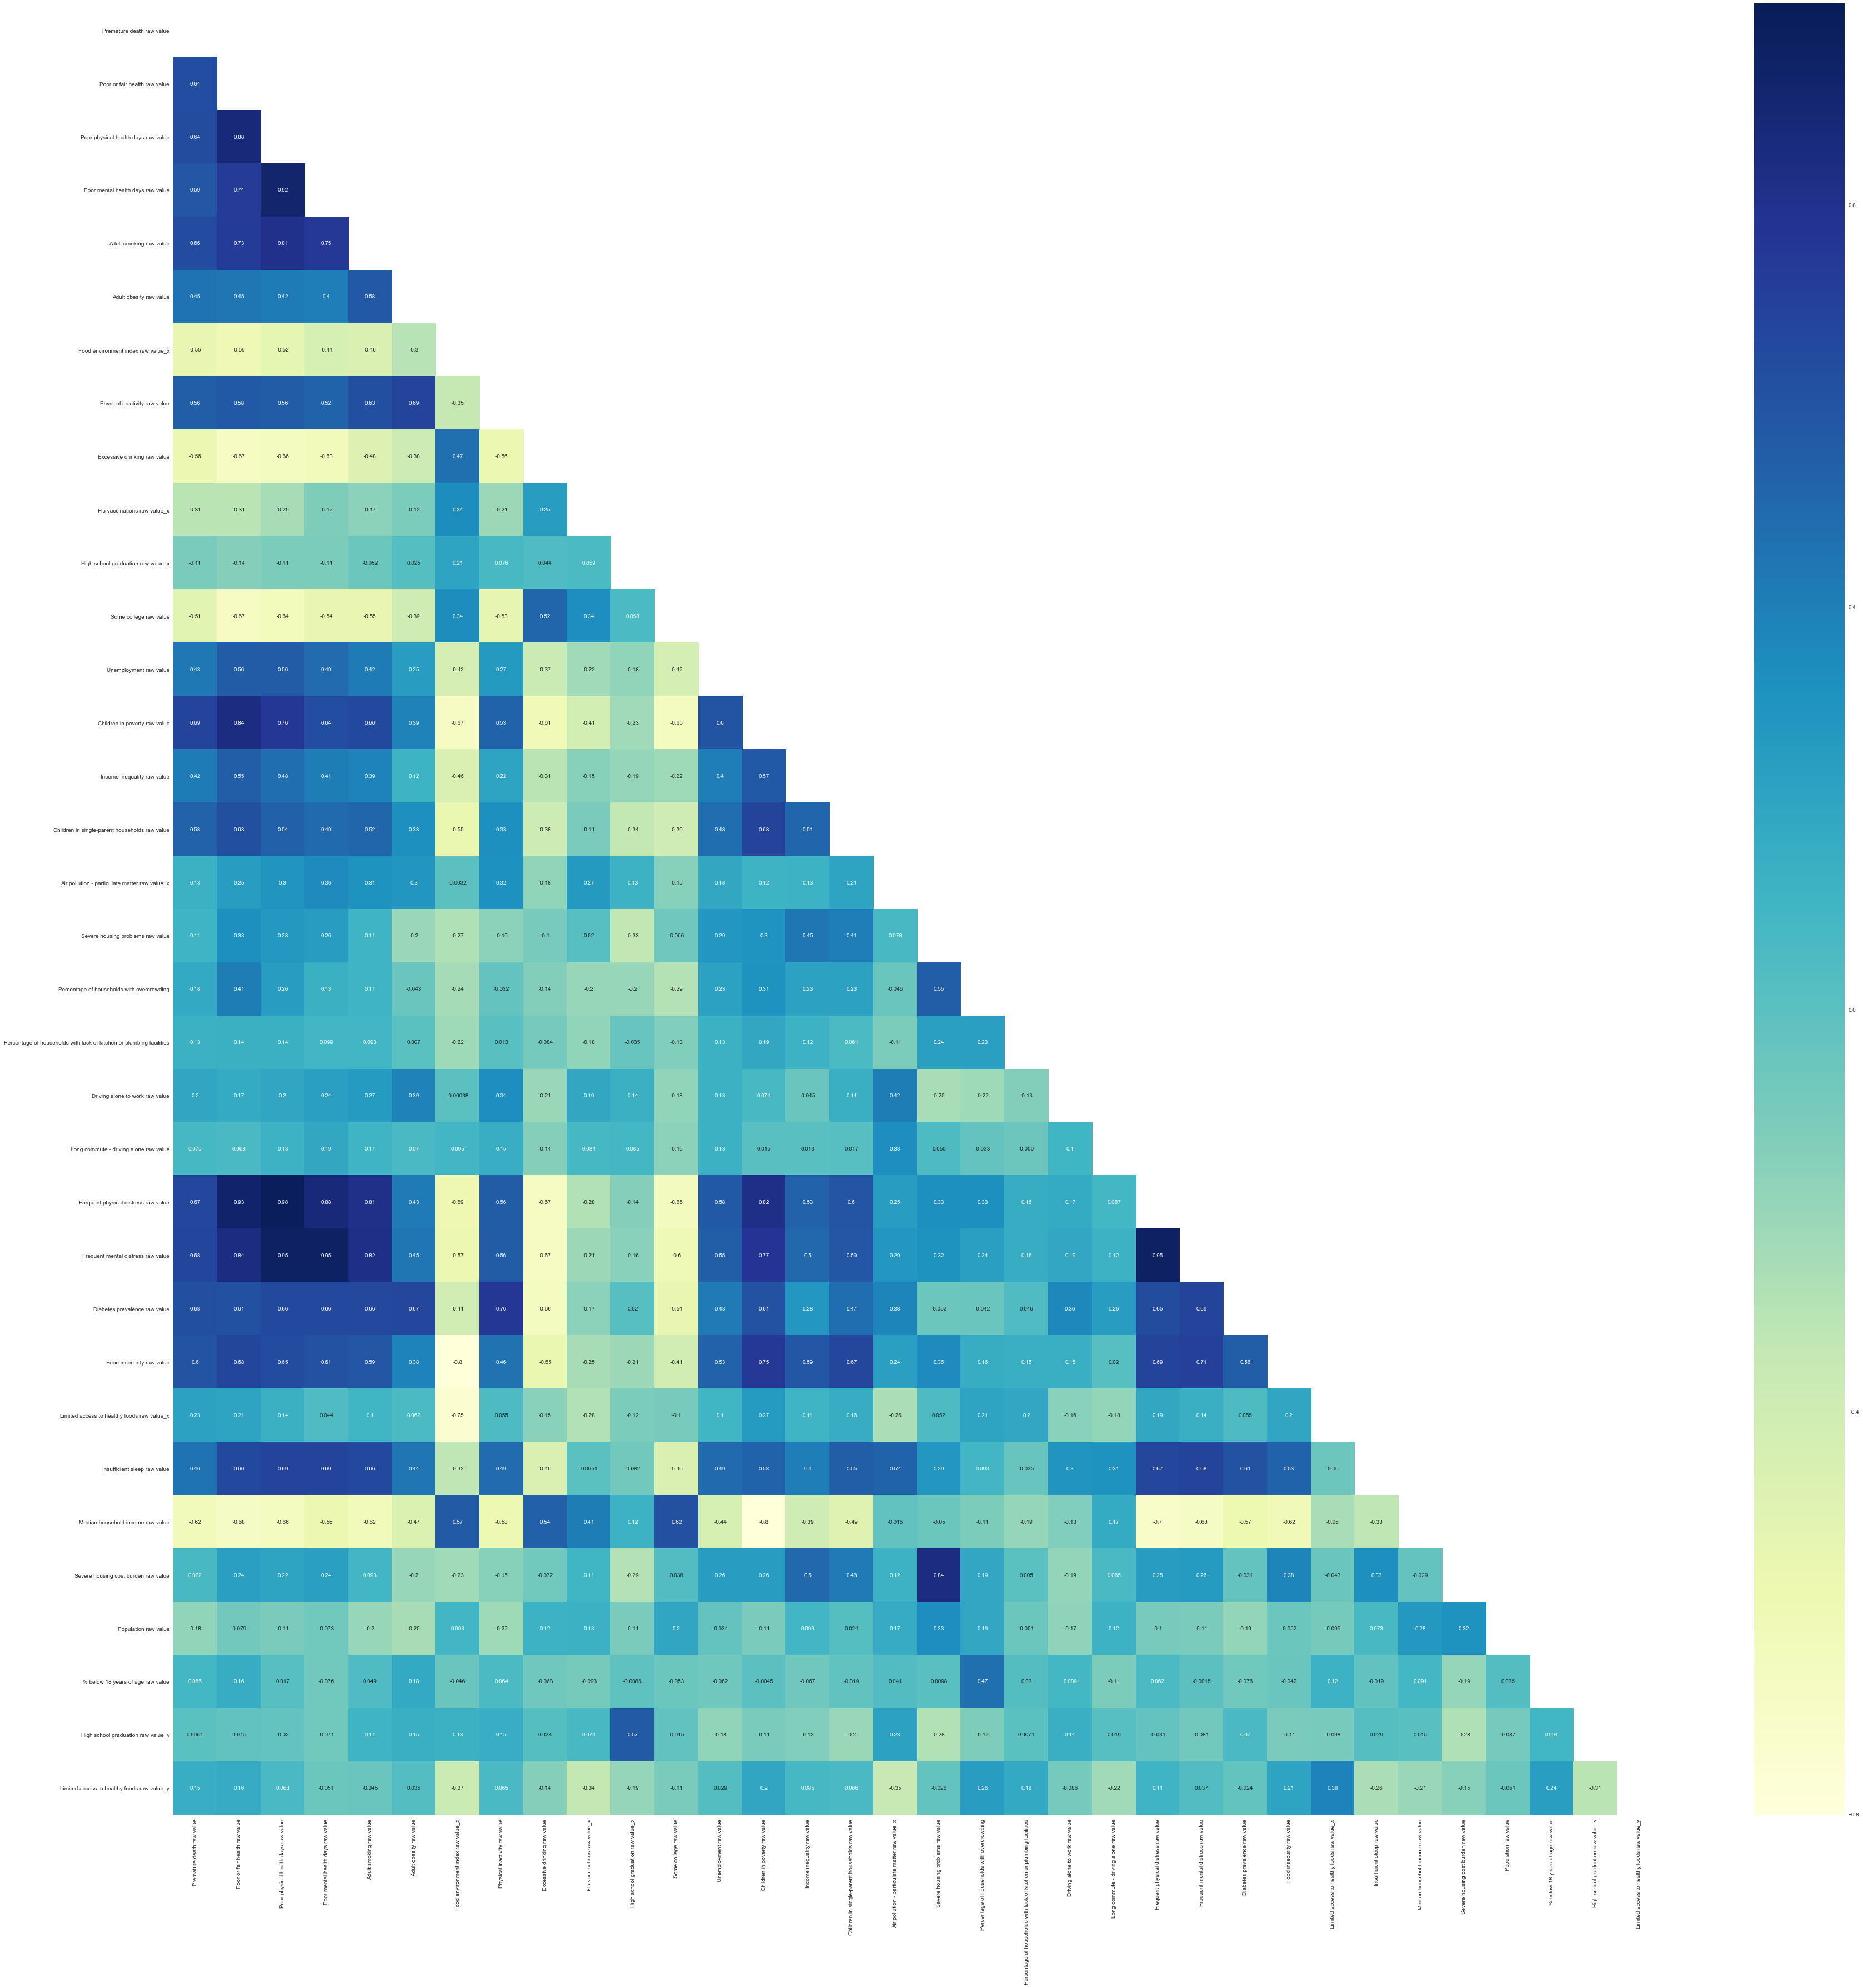

In [49]:
corr = df_clean4.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(60,60))
sns.heatmap(corr,annot=True, mask=mask,cmap="YlGnBu")
plt.autoscale()
plt.show()

#### Checking Variance Inflation Factor 

In [50]:
y = pd.DataFrame(df_clean4.loc[:,'Premature death raw value'])
X_before_vif = df_clean4.iloc[:,6:37]

In [51]:
X_before_vif.shape

(3052, 31)

In [52]:
y.shape

(3052, 1)

In [53]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_before_vif.values,i) for i in range(X_before_vif.shape[1])]
vif["features"] = X_before_vif.columns

In [54]:
vif.round(3).sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
21,4849.236,Frequent physical distress raw value
22,3266.363,Frequent mental distress raw value
1,3021.190,Poor physical health days raw value
2,1618.791,Poor mental health days raw value
5,537.675,Food environment index raw value_x
19,271.898,Driving alone to work raw value
0,255.345,Poor or fair health raw value
26,251.633,Insufficient sleep raw value
9,205.676,High school graduation raw value_x
4,145.780,Adult obesity raw value


In [55]:
columns_to_delete = ["Frequent physical distress raw value","Frequent mental distress raw value","Poor physical health days raw value",
                     "Poor mental health days raw value","Food environment index raw value_x","Driving alone to work raw value"
                     ,"Insufficient sleep raw value","High school graduation raw value_x","Adult smoking raw value",
                     "Severe housing problems raw value","Adult obesity raw value","Physical inactivity raw value","% below 18 years of age raw value",
                     "Some college raw value","Air pollution - particulate matter raw value_x","Long commute - driving alone raw value",
                     "Percentage of households with lack of kitchen or plumbing facilities","Children in poverty raw value","Income inequality raw value",
                     "Food insecurity raw value","Limited access to healthy foods raw value_x","Children in single-parent households raw value",
                     "Excessive drinking raw value","Unemployment raw value","Percentage of households with overcrowding",
                     "Population raw value"]
X_after_vif = X_before_vif.drop(columns=columns_to_delete,axis=1)

In [56]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_after_vif.values,i) for i in range(X_after_vif.shape[1])]
vif["features"] = X_after_vif.columns

In [57]:
vif.round(3).sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
2,31.256,Diabetes prevalence raw value
0,29.367,Poor or fair health raw value
1,22.893,Flu vaccinations raw value_x
3,15.568,Median household income raw value
4,12.696,Severe housing cost burden raw value


In [58]:
df_clean5 = y.merge(X_after_vif,left_index=True,right_index=True)

In [59]:
df_clean5.head()

,Premature death raw value,Poor or fair health raw value,Flu vaccinations raw value_x,Diabetes prevalence raw value,Median household income raw value,Severe housing cost burden raw value
0,8824.057123,0.184111,0.41,0.142,58343.0,0.126452
1,7224.632160,0.180605,0.45,0.113,56607.0,0.127959
2,9586.165037,0.257734,0.37,0.180,32490.0,0.135868
3,11783.543675,0.199969,0.39,0.149,45795.0,0.087339
4,10908.101822,0.210953,0.38,0.143,48253.0,0.081945


#### Adjusted Correlation Heatmap

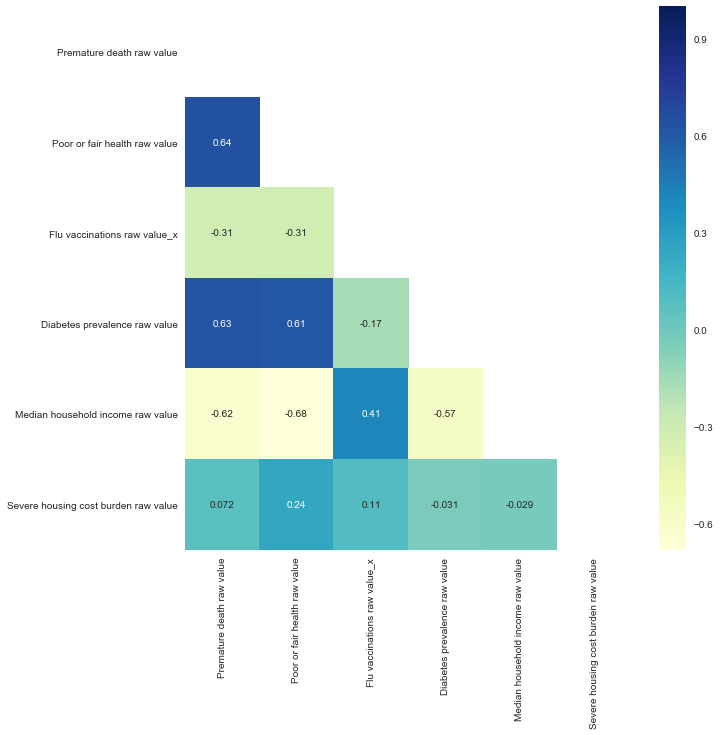

In [60]:
corr = df_clean5.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True, mask=mask,cmap="YlGnBu")
plt.autoscale()
plt.show()

We have plans for regularisation when modelling so we did not remove any variables where we saw minor collinearity.

## 4) Modeling

### Train Test Split

We split our dataset into a training dataset which is 2/3 of the data and a testing dataset which is 1/3 of the data.

In [61]:
y = df_clean5['Premature death raw value']
X = df_clean5.iloc[:,1:6]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.67)

In [62]:
X_train.shape

(2044, 5)

In [63]:
y_train.shape

(2044,)

In [64]:
X_test.shape

(1008, 5)

In [65]:
y_test.shape

(1008,)

### Baseline Model

We tested our linear regression model for our train data and achieved a mean r-squared value of 0.5223 and mean r-squared value of 0.5195 for the validation data using 5 folds in a K-Fold validation.

In [66]:
baseline_model = Baseline(X_train,y_train,5)
Linear_Model = baseline_model.get_score()
Linear_Model

,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.5223,0.5195,0.0028,-3520000.0,-3570000.0,50000.0,5


### Polynomial Models

We next employed polynomial features for our dataset. As we were using 5 features in our baseline we decided to explore polynomial regressions with a degree of freedom of 2, 3 ,4, and 5 which are quadratic, cubic, quartic, and quintic, respectively.

#### Quadratic

In [67]:
X_poly_2d = Polynomials(X_train,y_train,5,2)
Quadratic_Model = X_poly_2d.get_score()
Quadratic_Model

,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.5554,0.5178,0.0376,-3280000.0,-3590000.0,310000.0,20


#### Cubic

In [68]:
X_poly_3d = Polynomials(X_train,y_train,5,3)
Cubic_Model = X_poly_3d.get_score()
Cubic_Model

,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.5537,0.5206,0.0331,-3290000.0,-3570000.0,280000.0,55


#### Quartic

In [69]:
X_poly_4d = Polynomials(X_train,y_train,5,4)
Quartic_Model = X_poly_4d.get_score()
Quartic_Model

,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.5437,0.5035,0.0402,-3360000.0,-3690000.0,330000.0,125


#### Quintic

In [70]:
X_poly_5d = Polynomials(X_train,y_train,5,5)
Quintic_Model = X_poly_5d.get_score()
Quintic_Model

,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.4592,0.3446,0.1146,-4010000.0,-4800000.0,790000.0,251


#### Polynomial Models Compared

Using K-Fold validation, our quadratic regression model train data achieved a mean r-squared value of 0.5554 and the validation achieved a value of 0.5178. So, here we have a r-squared difference of 0.0376, which is relatively small, impying that our model does not suffer for major overfitting issues.

The quadratic regression model outperformed the baseline, cubic, quartic, and quintic models in relation to mean r-squared scores.

In [71]:
Polynomial_Models = pd.concat([Quadratic_Model,Cubic_Model,Quartic_Model,Quintic_Model])
Polynomial_Models.reset_index(inplace=True)
Polynomial_Models.rename(columns={"index": "Degrees of Freedom"},inplace=True)
Polynomial_Models["Degrees of Freedom"] = [2,3,4,5]
Polynomial_Models

,Degrees of Freedom,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,2,0.5554,0.5178,0.0376,-3280000.0,-3590000.0,310000.0,20
1,3,0.5537,0.5206,0.0331,-3290000.0,-3570000.0,280000.0,55
2,4,0.5437,0.5035,0.0402,-3360000.0,-3690000.0,330000.0,125
3,5,0.4592,0.3446,0.1146,-4010000.0,-4800000.0,790000.0,251


We selected the polynomial model with 2 degrees of freedom, as it had the best r-squared scores with the least coefficients (least complex).

In [72]:
Best_Polynomial_Model = pd.DataFrame([Polynomial_Models.iloc[0]])
Best_Polynomial_Model

,Degrees of Freedom,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,2.0,0.5554,0.5178,0.0376,-3280000.0,-3590000.0,310000.0,20.0


### Scaling

As a next step we will take the quadratic data forward to be scaled and be used in regularisation regression models inlcuding Ridge, Lasso, and ElasticNet, with the goal of reducing the overfitting of the model, but maintaining a relatively high r-squared score.

Prior to scaling we did a polynomial trasnformation on the test data with split earlier on.

In [73]:
poly_test_2d = Polynomials(X_train,y_train,5,2)
X_poly_test_2d = poly_test_2d.poly_reg_test(X_test)

Here we did some scaling to our quadratically transformed datasets. The purpose of scaling is to help standardise our data before applyng regularisation regressions techqniues, or else our features with larger values will be penalised more dramatically than the smaller feature values.

In [74]:
scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_poly_2d.x_poly))
X_test_s = pd.DataFrame(scaler.transform(X_poly_test_2d))

In [75]:
X_train_s.columns = X_poly_2d.column_names
X_test_s.columns = X_poly_2d.column_names

### Regularisation Regression Models

We formed 20 Lasso models, 20 Ridge models, and 20 Elastic Net models with different penalty values (alpha).

#### Lasso Regression

In [76]:
X_train_s.columns

Index(['1', 'Poor or fair health raw value', 'Flu vaccinations raw value_x',
       'Diabetes prevalence raw value', 'Median household income raw value',
       'Severe housing cost burden raw value',
       'Poor or fair health raw value^2',
       'Poor or fair health raw value Flu vaccinations raw value_x',
       'Poor or fair health raw value Diabetes prevalence raw value',
       'Poor or fair health raw value Median household income raw value',
       'Poor or fair health raw value Severe housing cost burden raw value',
       'Flu vaccinations raw value_x^2',
       'Flu vaccinations raw value_x Diabetes prevalence raw value',
       'Flu vaccinations raw value_x Median household income raw value',
       'Flu vaccinations raw value_x Severe housing cost burden raw value',
       'Diabetes prevalence raw value^2',
       'Diabetes prevalence raw value Median household income raw value',
       'Diabetes prevalence raw value Severe housing cost burden raw value',
       'Median 

In [77]:
lasso_models = Regularisation('lasso',X_train_s,y_train,5,100)
Lasso_Models = lasso_models.get_scores()
Lasso_Models

,Alpha,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.001000,0.5554,0.5179,0.0375,-3280000.0,-3590000.0,310000.0,20
1,5.264105,0.5495,0.5248,0.0247,-3320000.0,-3540000.0,220000.0,15
2,10.527211,0.5363,0.5198,0.0165,-3420000.0,-3580000.0,160000.0,13
3,15.790316,0.5270,0.5182,0.0088,-3490000.0,-3590000.0,100000.0,7
4,21.053421,0.5258,0.5201,0.0057,-3500000.0,-3570000.0,70000.0,7
5,26.316526,0.5253,0.5208,0.0045,-3500000.0,-3570000.0,70000.0,7
6,31.579632,0.5250,0.5210,0.0040,-3500000.0,-3570000.0,70000.0,6
7,36.842737,0.5247,0.5212,0.0035,-3500000.0,-3560000.0,60000.0,6
8,42.105842,0.5244,0.5212,0.0032,-3510000.0,-3560000.0,50000.0,6
9,47.368947,0.5241,0.5211,0.0030,-3510000.0,-3560000.0,50000.0,5


We selected the best Lasso model by considering the smallest number of coefficients for simplicity and a high r-squared train and validation score for accuracy.

In [78]:
Best_Lasso_Model = pd.DataFrame([Lasso_Models.iloc[9]])
Best_Lasso_Model

,Alpha,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
9,47.368947,0.5241,0.5211,0.003,-3510000.0,-3560000.0,50000.0,5.0


#### Ridge Regression

In [79]:
ridge_models = Regularisation('ridge',X_train_s,y_train,5,100)
Ridge_Models = ridge_models.get_scores()
Ridge_Models

,Alpha,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.001000,0.5554,0.5178,0.0376,-3280000.0,-3590000.0,310000.0,20
1,5.264105,0.5514,0.5215,0.0299,-3310000.0,-3570000.0,260000.0,20
2,10.527211,0.5473,0.5212,0.0261,-3340000.0,-3570000.0,230000.0,20
3,15.790316,0.5441,0.5206,0.0235,-3360000.0,-3570000.0,210000.0,20
4,21.053421,0.5416,0.5200,0.0216,-3380000.0,-3580000.0,200000.0,20
5,26.316526,0.5395,0.5195,0.0200,-3390000.0,-3580000.0,190000.0,20
6,31.579632,0.5378,0.5190,0.0188,-3410000.0,-3590000.0,180000.0,20
7,36.842737,0.5363,0.5187,0.0176,-3420000.0,-3590000.0,170000.0,20
8,42.105842,0.5351,0.5184,0.0167,-3430000.0,-3590000.0,160000.0,20
9,47.368947,0.5341,0.5181,0.0160,-3440000.0,-3590000.0,150000.0,20


We selected the best Ridge model by considering the highest r-squared train and validation score for accuracy.

In [80]:
Best_Ridge_Model = pd.DataFrame([Ridge_Models.iloc[0]])
Best_Ridge_Model

,Alpha,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.001,0.5554,0.5178,0.0376,-3280000.0,-3590000.0,310000.0,20.0


#### Elastic Net Regression

In [81]:
en_models = Regularisation('elastic',X_train_s,y_train,5,100)
ElasticNet_Models = en_models.get_scores()
ElasticNet_Models

,Alpha,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.001000,0.5552,0.5193,0.0359,-3280000.0,-3580000.0,300000.0,20
1,5.264105,0.4796,0.4805,0.0009,-3840000.0,-3870000.0,30000.0,19
2,10.527211,0.4251,0.4267,0.0016,-4240000.0,-4260000.0,20000.0,20
3,15.790316,0.3764,0.3779,0.0015,-4590000.0,-4620000.0,30000.0,20
4,21.053421,0.3358,0.3370,0.0012,-4890000.0,-4920000.0,30000.0,20
5,26.316526,0.3022,0.3030,0.0008,-5140000.0,-5160000.0,20000.0,20
6,31.579632,0.2742,0.2746,0.0004,-5350000.0,-5370000.0,20000.0,20
7,36.842737,0.2506,0.2508,0.0002,-5520000.0,-5540000.0,20000.0,20
8,42.105842,0.2306,0.2305,0.0001,-5670000.0,-5690000.0,20000.0,20
9,47.368947,0.2134,0.2130,0.0004,-5790000.0,-5810000.0,20000.0,20


We selected the best Elastic Net model by considering the highest r-squared train and validation score for accuracy. 

In [82]:
Best_ElasticNet_Model = pd.DataFrame([ElasticNet_Models.iloc[0]])
Best_ElasticNet_Model

,Alpha,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
0,0.001,0.5552,0.5193,0.0359,-3280000.0,-3580000.0,300000.0,20.0


## 5) Evaluation

### Model Selection

In [83]:
Best_Models = pd.DataFrame({"Model":[],"R^2 Train Score":[],"R^2 Validation Score":[],"R^2 Difference":[],
                            "MSE Train Score":[],"MSE Validation Score":[],"MSE Difference":[],"Number of Coefficients":[]})
Best_Models.loc[1] = Linear_Model.iloc[0]
Best_Models.loc[Polynomial_Models.index[2]] = Best_Polynomial_Model.iloc[0]
Best_Models.loc[Lasso_Models.index[3]] = Best_Lasso_Model.iloc[0]
Best_Models.loc[Ridge_Models.index[4]] = Best_Ridge_Model.iloc[0]
Best_Models.loc[ElasticNet_Models.index[5]] = Best_ElasticNet_Model.iloc[0]

In [84]:
Best_Models["Model"] = ["Baseline","Polynomial (Quadratic)","Lasso (alpha = 47.373684)","Ridge (alpha = 0.01)","Elastic Net (alpha = 0.01)"]

In [85]:
Best_Models

,Model,R^2 Train Score,R^2 Validation Score,R^2 Difference,MSE Train Score,MSE Validation Score,MSE Difference,Number of Coefficients
1,Baseline,0.5223,0.5195,0.0028,-3520000.0,-3570000.0,50000.0,5.0
2,Polynomial (Quadratic),0.5554,0.5178,0.0376,-3280000.0,-3590000.0,310000.0,20.0
3,Lasso (alpha = 47.373684),0.5241,0.5211,0.0030,-3510000.0,-3560000.0,50000.0,5.0
4,Ridge (alpha = 0.01),0.5554,0.5178,0.0376,-3280000.0,-3590000.0,310000.0,20.0
5,Elastic Net (alpha = 0.01),0.5552,0.5193,0.0359,-3280000.0,-3580000.0,300000.0,20.0


<Figure size 864x864 with 0 Axes>

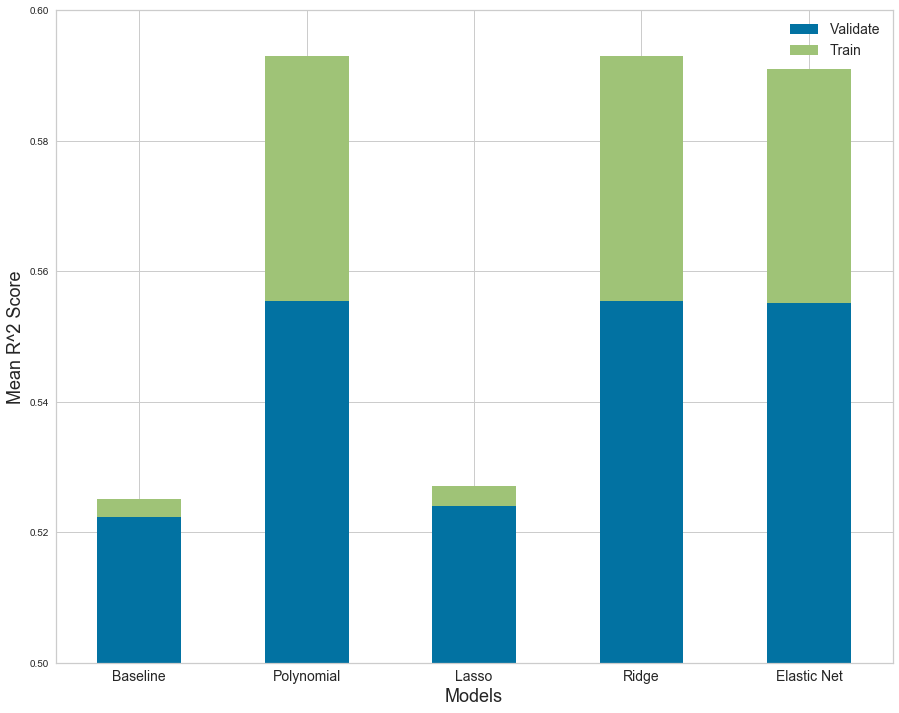

In [86]:
x = Best_Models[['R^2 Train Score','R^2 Difference']]
y = Best_Models[['Model']]

plt.figure(figsize=(12,12))
Best_Models[['R^2 Train Score','R^2 Difference']].plot(kind='bar',stacked=True,figsize=(15,12))
plt.xticks([0,1,2,3,4], ["Baseline","Polynomial",'Lasso',"Ridge","Elastic Net"], fontsize=14,rotation="horizontal")
plt.ylim(bottom=0.5, top=0.60)
plt.legend(labels=['Validate', 'Train'], fontsize=14)
plt.xlabel('Models',fontsize=18)
plt.ylabel('Mean R^2 Score', fontsize=18)
plt.show()

Both the baseline and lasso model have simpler models with 5 features and both have low overfitting and are only underperforming to 2 decimal places compare to the polynomial, ridge, and elastic net models, which all have 20+ features. Prioritising simplicity we chose the baseline and lasso models over the others.

We decided to use the lasso model as the r-squared scores was slightly higher than the baseline model.

### Testing Best Model

In [92]:
lasso = Lasso(alpha=47.368947)
lasso.fit(X_train_s,y_train)
lasso_train_score=lasso.score(X_train_s,y_train)
lasso_test_score=lasso.score(X_test_s,y_test)

Final_Train_Test_Scores_df = pd.DataFrame({'Training R^2 Score':[round(lasso_train_score,4)],'Test R^2 Score':[round(lasso_test_score,4)]})
Final_Train_Test_Scores_df

,Training R^2 Score,Test R^2 Score
0,0.5231,0.5626


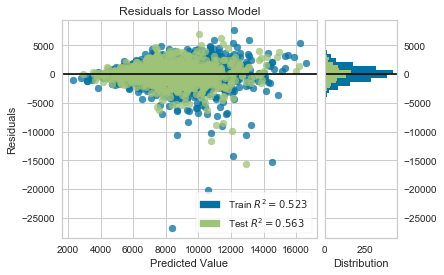

In [88]:
visualizer = ResidualsPlot(lasso)
visualizer.fit(X_train_s, y_train)
visualizer.score(X_test_s, y_test)
visualizer.show()

Creating a dataframe containing the Lasso model variables and their respective weights.

In [89]:
Final_Model_Coefs_df = pd.DataFrame(lasso_models.all_coef_values.iloc[9])
Final_Model_Coefs_df.reset_index(inplace=True)
Final_Model_Coefs_df.columns = ['Coefficient','ScaledValue']
Final_Model_Coefs_df = Final_Model_Coefs_df[Final_Model_Coefs_df["ScaledValue"]!=0]

In [90]:
Final_Model_Coefs_df

,Coefficient,ScaledValue
1,Flu vaccinations raw value_x,-239.247
2,Diabetes prevalence raw value,218.996
3,Median household income raw value,-595.781
7,Poor or fair health raw value Diabetes prevale...,1132.14
16,Diabetes prevalence raw value Severe housing c...,53.9116
